# Understanding the data

# Data Exploration

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [7]:
from sklearn.datasets import load_breast_cancer
load_data= load_breast_cancer()
X= load_data.data

In [8]:
y = load_data.target

In [9]:
X.shape

(569, 30)

In [10]:
# extracting the target size
y.shape

(569,)

In [11]:
labels= np.reshape(load_data.target,(569,1))

In [12]:
#For better understanding, I'll add the labels
data= np.concatenate([X,labels],axis=1)

In [13]:
feature_names = np.append(load_data.feature_names, 'target')

In [14]:
feat = load_data.feature_names

In [15]:
data = pd.DataFrame(data)

In [16]:
data.columns = feature_names

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [18]:
data['target'].replace(0,"Benign", inplace=True)
data['target'].replace(1,"Malignant", inplace=True)

In [19]:
data.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension    ...      worst texture  worst perimeter  \
564                 0.05623    ...              26.40           166.10   
565                 0.05533    ...              38.25           155.00   
566                 0.05648    ...              34.12           126.70   
567                 0.07016    ...              39.42           184.60   
568                 0.05884    ...              30.37            59.16   

     worst area  worst smoothness  worst compactness  worst concavity  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension     target  
564                0.2216          0.2060                  0.07115     Benign  
565                0.1628          0.2572                  0.06637     Benign  
566                0.1418          0.2218                  0.07820     Benign  
567                0.2650          0.4087                  0.12400     Benign  
568                0.0000          0.2871                  0.07039  Malignant  

[5 rows x 31 columns]

# Data visualization using PCA

In [20]:
#sns.pairplot(data)

In [21]:
wo_target=feature_names[:-1]
x = data.loc[:,wo_target]

In [22]:
from sklearn.preprocessing import StandardScaler
x= StandardScaler().fit_transform(x.values)

In [23]:
x.shape

(569, 30)

In [24]:
np.mean(x), np.std(x)

(-6.826538293184326e-17, 1.0)

In [25]:
feat_cols= ['feature'+ str(i) for i in range(x.shape[1])]

In [26]:
pca_data = pd.DataFrame(x,columns=feat_cols)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

In [118]:
principalComponents

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [29]:
principal_df = pd.DataFrame(data=principalComponents,columns=['principal component 1','principal component 2'])

In [30]:
pca.components_

array([[ 0.21890244,  0.10372458,  0.22753729,  0.22099499,  0.14258969,
         0.23928535,  0.25840048,  0.26085376,  0.13816696,  0.06436335,
         0.20597878,  0.01742803,  0.21132592,  0.20286964,  0.01453145,
         0.17039345,  0.15358979,  0.1834174 ,  0.04249842,  0.10256832,
         0.22799663,  0.10446933,  0.23663968,  0.22487053,  0.12795256,
         0.21009588,  0.22876753,  0.25088597,  0.12290456,  0.13178394],
       [-0.23385713, -0.05970609, -0.21518136, -0.23107671,  0.18611302,
         0.15189161,  0.06016536, -0.0347675 ,  0.19034877,  0.36657547,
        -0.10555215,  0.08997968, -0.08945723, -0.15229263,  0.20443045,
         0.2327159 ,  0.19720728,  0.13032156,  0.183848  ,  0.28009203,
        -0.21986638, -0.0454673 , -0.19987843, -0.21935186,  0.17230435,
         0.14359317,  0.09796411, -0.00825724,  0.14188335,  0.27533947]])

In [31]:
principal_df

principal component 1  principal component 2
0                 9.192837               1.948583
1                 2.387802              -3.768172
2                 5.733896              -1.075174
3                 7.122953              10.275589
4                 3.935302              -1.948072
5                 2.380247               3.949929
6                 2.238883              -2.690031
7                 2.143299               2.340244
8                 3.174924               3.391813
9                 6.351747               7.727174
10               -0.810414              -2.659275
11                2.651100               0.066568
12                8.185034               2.700976
13                0.342126              -0.968279
14                4.342379               4.861083
15                4.075656               2.977061
16                0.230055              -1.564758
17                4.418011               1.418670
18                4.948704              -4.114334
19               -1.237063              -0.188215
20               -1.578161               0.572808
21               -3.557336               1.662950
22                4.733211               3.304964
23                4.208524              -5.128367
24                4.949632              -1.543752
25                7.098563               2.018610
26                3.510263               2.171625
27                3.064054              -1.876552
28                4.007264               0.537242
29                1.715310              -1.523705
..                     ...                    ...
539              -1.142832               5.599458
540              -1.665475               2.389618
541               1.011712               1.092390
542              -1.300930              -1.821415
543              -2.373429              -1.681576
544              -1.665871              -0.213963
545              -1.927678              -1.137740
546              -4.237217               0.184272
547              -2.677871               2.315793
548              -3.836498               0.496250
549              -2.551440               0.228330
550              -4.694923              -0.767478
551              -2.025037               1.261242
552              -2.895948              -1.451636
553              -3.502201               1.800832
554              -2.153904              -0.830069
555              -2.055084               1.616459
556              -3.877290               1.084255
557              -4.063862               0.122168
558              -0.098667              -0.213560
559              -1.089376               1.292848
560              -0.481771              -0.178020
561              -4.870310              -2.131106
562               5.917613               3.482637
563               8.741338              -0.573855
564               6.439315              -3.576817
565               3.793382              -3.584048
566               1.256179              -1.902297
567              10.374794               1.672010
568              -5.475243              -0.670637

[569 rows x 2 columns]

In [32]:
principal_df['target']=data['target']

In [33]:
b =principal_df[principal_df['target']== 'Benign']
m =principal_df[principal_df['target']== 'Malignant']

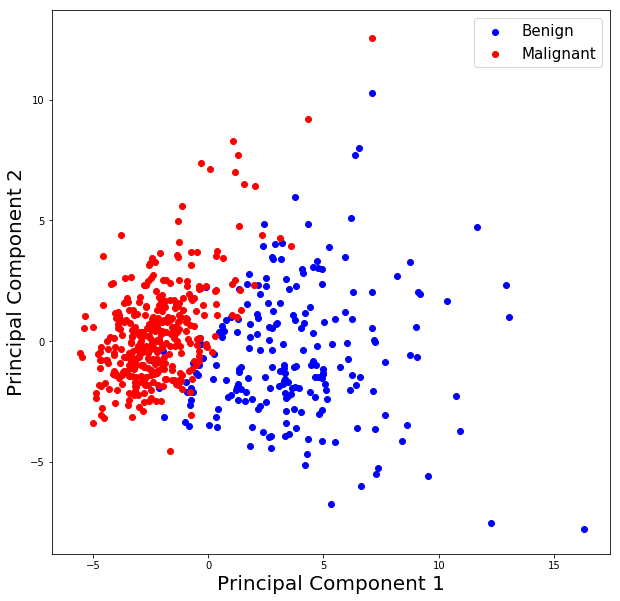

In [34]:
plt.figure(figsize=(10,10))
plt.xlabel('Principal Component 1',fontsize=20)
plt.ylabel('Principal Component 2',fontsize=20)
plt.legend(['Benign','Malignant'],prop={'size': 15})

plt.scatter(b['principal component 1'],b['principal component 2'],color=['b'])
plt.scatter(m['principal component 1'],m['principal component 2'],color=['r'])
plt.legend(['Benign','Malignant'],prop={'size': 15})

# The other site

In [149]:
mean_vec = np.mean(x, axis=0)
cov_mat = (x - mean_vec).T.dot((x - mean_vec)) / (x.shape[0]-1)
np.set_printoptions(precision=4)
np.set_printoptions(suppress=True)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[ 1.0018  0.3244  0.9996  0.9891  0.1709  0.507   0.678   0.824   0.148
  -0.3122  0.6803 -0.0975  0.6754  0.7372 -0.223   0.2064  0.1945  0.3768
  -0.1045 -0.0427  0.9712  0.2975  0.9668  0.9427  0.1198  0.4142  0.5278
   0.7455  0.1642  0.0071]
 [ 0.3244  1.0018  0.3301  0.3217 -0.0234  0.2371  0.303   0.294   0.0715
  -0.0766  0.2764  0.387   0.2822  0.2603  0.0066  0.1923  0.1435  0.1641
   0.0091  0.0546  0.3532  0.9137  0.3587  0.3442  0.0776  0.2783  0.3016
   0.2958  0.1052  0.1194]
 [ 0.9996  0.3301  1.0018  0.9882  0.2076  0.5579  0.7174  0.8525  0.1833
  -0.2619  0.693  -0.0869  0.6944  0.7463 -0.2031  0.2512  0.2285  0.4079
  -0.0818 -0.0055  0.9712  0.3036  0.9721  0.9432  0.1508  0.4566  0.5649
   0.7726  0.1894  0.0511]
 [ 0.9891  0.3217  0.9882  1.0018  0.1773  0.4994  0.6872  0.8247  0.1516
  -0.2836  0.7339 -0.0664  0.7279  0.8015 -0.1671  0.213   0.208   0.373
  -0.0726 -0.0199  0.9644  0.288   0.9608  0.9609  0.1237  0.3911  0.5135
   0.7233  0.1

In [150]:
cov_mat.shape

(30, 30)

In [151]:
cov_mat = np.cov(x.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[ 0.2189 -0.2339 -0.0085  0.0414 -0.0378  0.0187  0.1241  0.0075 -0.2231
   0.0955  0.0415  0.0511  0.012  -0.0595  0.0511 -0.1506  0.2029  0.1467
   0.2254  0.7024 -0.2115  0.2112  0.1315 -0.1295 -0.0192  0.1826 -0.0986
   0.0729  0.0497  0.0686]
 [ 0.1037 -0.0597  0.0645 -0.6031  0.0495 -0.0322 -0.0114 -0.1307  0.1127
   0.2409 -0.3022  0.2549  0.2035  0.0216  0.1079 -0.1578 -0.0387 -0.0411
   0.0298  0.0003  0.0105 -0.0001  0.0174 -0.0246  0.0847 -0.0988 -0.0006
   0.0948  0.2441 -0.4484]
 [ 0.2275 -0.2152 -0.0093  0.042  -0.0374  0.0173  0.1145  0.0187 -0.2237
   0.0864  0.0168  0.0389  0.0441 -0.0485  0.0399 -0.1145  0.1948  0.1583
   0.2396 -0.6899 -0.3838  0.0843  0.1154 -0.1253  0.027   0.1166 -0.0402
   0.0752  0.0177  0.0698]
 [ 0.221  -0.2311  0.0287  0.0534 -0.0103 -0.0019  0.0517 -0.0347 -0.1956
   0.075   0.1102  0.0654  0.0674 -0.0108 -0.014  -0.1324  0.2557  0.2662
  -0.0273 -0.0329  0.4228 -0.2725 -0.4666  0.3627 -0.21   -0.0698  0.0078
   0.0976  0.0901

In [37]:
u,s,v = np.linalg.svd(x.T)
u

array([[-2.18902444e-01,  2.33857132e-01,  8.53124284e-03,
        -4.14089623e-02,  3.77863538e-02, -1.87407904e-02,
         1.24088340e-01, -7.45229622e-03,  2.23109764e-01,
        -9.54864432e-02,  4.14714866e-02, -5.10674568e-02,
        -1.19672116e-02,  5.95061348e-02,  5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
         2.25384659e-01,  4.96986642e-02,  6.85700057e-02,
         7.29289034e-02,  9.85526942e-02,  1.82579441e-01,
        -1.92264989e-02, -1.29476396e-01, -1.31526670e-01,
        -2.11194013e-01, -2.11460455e-01, -7.02414091e-01],
       [-1.03724578e-01,  5.97060883e-02, -6.45499033e-02,
         6.03050001e-01, -4.94688505e-02,  3.21788366e-02,
        -1.13995382e-02,  1.30674825e-01, -1.12699390e-01,
        -2.40934066e-01, -3.02243402e-01, -2.54896423e-01,
        -2.03461333e-01, -2.15600995e-02,  1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
         2.97886446e-02,  2.44134993e-01, -4.48369467e-

In [38]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('Everything ok!')

Everything ok!


In [39]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort()
eig_pairs.reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
13.30499079437457
5.701374603726143
2.8229101550062254
1.984127517730206
1.6516332423301192
1.2094822398029692
0.6764088817009041
0.47745625468950786
0.41762878210781856
0.35131087488173346
0.2944331534911648
0.2616211613661208
0.24178242132831365
0.15728614921759312
0.09430069560105594
0.08000340447737729
0.059503613530432035
0.05271142221014776
0.049564700212981504
0.031214260553066513
0.030025663090428534
0.027487711338904253
0.024383691354591154
0.018086793984305332
0.015508527134418604
0.008192037117606918
0.006912612579184442
0.0015921360011973413
0.0007501214127189235
0.00013327905666418076


In [40]:
import plotly
plotly.tools.set_credentials_file(username='aaaad3', api_key='dY6Aw73RJE2Oz5dBtQia')

In [41]:
import plotly.plotly as py

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,31)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,31)], 
    y=cum_var_exp,
    name='Cumulative'
)

datay = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=datay, layout=layout)
py.iplot(fig, filename='selecting-principal-components')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~aaaad3/0 or inside your plot.ly account where it is named 'selecting-principal-components'


C:\Users\fathinah\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [42]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(30,1), 
                      eig_pairs[1][1].reshape(30,1)))

print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.21890244 -0.23385713]
 [ 0.10372458 -0.05970609]
 [ 0.22753729 -0.21518136]
 [ 0.22099499 -0.23107671]
 [ 0.14258969  0.18611302]
 [ 0.23928535  0.15189161]
 [ 0.25840048  0.06016536]
 [ 0.26085376 -0.0347675 ]
 [ 0.13816696  0.19034877]
 [ 0.06436335  0.36657547]
 [ 0.20597878 -0.10555215]
 [ 0.01742803  0.08997968]
 [ 0.21132592 -0.08945723]
 [ 0.20286964 -0.15229263]
 [ 0.01453145  0.20443045]
 [ 0.17039345  0.2327159 ]
 [ 0.15358979  0.19720728]
 [ 0.1834174   0.13032156]
 [ 0.04249842  0.183848  ]
 [ 0.10256832  0.28009203]
 [ 0.22799663 -0.21986638]
 [ 0.10446933 -0.0454673 ]
 [ 0.23663968 -0.19987843]
 [ 0.22487053 -0.21935186]
 [ 0.12795256  0.17230435]
 [ 0.21009588  0.14359317]
 [ 0.22876753  0.09796411]
 [ 0.25088597 -0.00825724]
 [ 0.12290456  0.14188335]
 [ 0.13178394  0.27533947]]


In [43]:
Y = x.dot(matrix_w)

In [44]:
pd.DataFrame(Y)

0          1
0     9.192837   1.948583
1     2.387802  -3.768172
2     5.733896  -1.075174
3     7.122953  10.275589
4     3.935302  -1.948072
5     2.380247   3.949929
6     2.238883  -2.690031
7     2.143299   2.340244
8     3.174924   3.391813
9     6.351747   7.727174
10   -0.810414  -2.659275
11    2.651100   0.066568
12    8.185034   2.700976
13    0.342126  -0.968279
14    4.342379   4.861083
15    4.075656   2.977061
16    0.230055  -1.564758
17    4.418011   1.418670
18    4.948704  -4.114334
19   -1.237063  -0.188215
20   -1.578161   0.572808
21   -3.557336   1.662950
22    4.733211   3.304964
23    4.208524  -5.128367
24    4.949632  -1.543752
25    7.098563   2.018610
26    3.510263   2.171625
27    3.064054  -1.876552
28    4.007264   0.537242
29    1.715310  -1.523705
..         ...        ...
539  -1.142832   5.599458
540  -1.665475   2.389618
541   1.011712   1.092390
542  -1.300930  -1.821415
543  -2.373429  -1.681576
544  -1.665871  -0.213963
545  -1.927678  -1.137740
546  -4.237217   0.184272
547  -2.677871   2.315793
548  -3.836498   0.496250
549  -2.551440   0.228330
550  -4.694923  -0.767478
551  -2.025037   1.261242
552  -2.895948  -1.451636
553  -3.502201   1.800832
554  -2.153904  -0.830069
555  -2.055084   1.616459
556  -3.877290   1.084255
557  -4.063862   0.122168
558  -0.098667  -0.213560
559  -1.089376   1.292848
560  -0.481771  -0.178020
561  -4.870310  -2.131106
562   5.917613   3.482637
563   8.741338  -0.573855
564   6.439315  -3.576817
565   3.793382  -3.584048
566   1.256179  -1.902297
567  10.374794   1.672010
568  -5.475243  -0.670637

[569 rows x 2 columns]

In [45]:
datas = []
trace = dict(
    type='scatter',
    x=Y[b.index,0],
    y=Y[b.index,1],
    name="Benign",
    mode='markers'
)
datas.append(trace)

trace = dict(
    type='scatter',
    x=Y[m.index,0],
    y=Y[m.index,1],
    name="Malignant",
    mode='markers',

)
datas.append(trace)

layout = dict(
    showlegend=True,
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2')
    )
)

fig = dict(data=datas, layout=layout)
py.iplot(fig, filename='projection-matrix')

C:\Users\fathinah\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



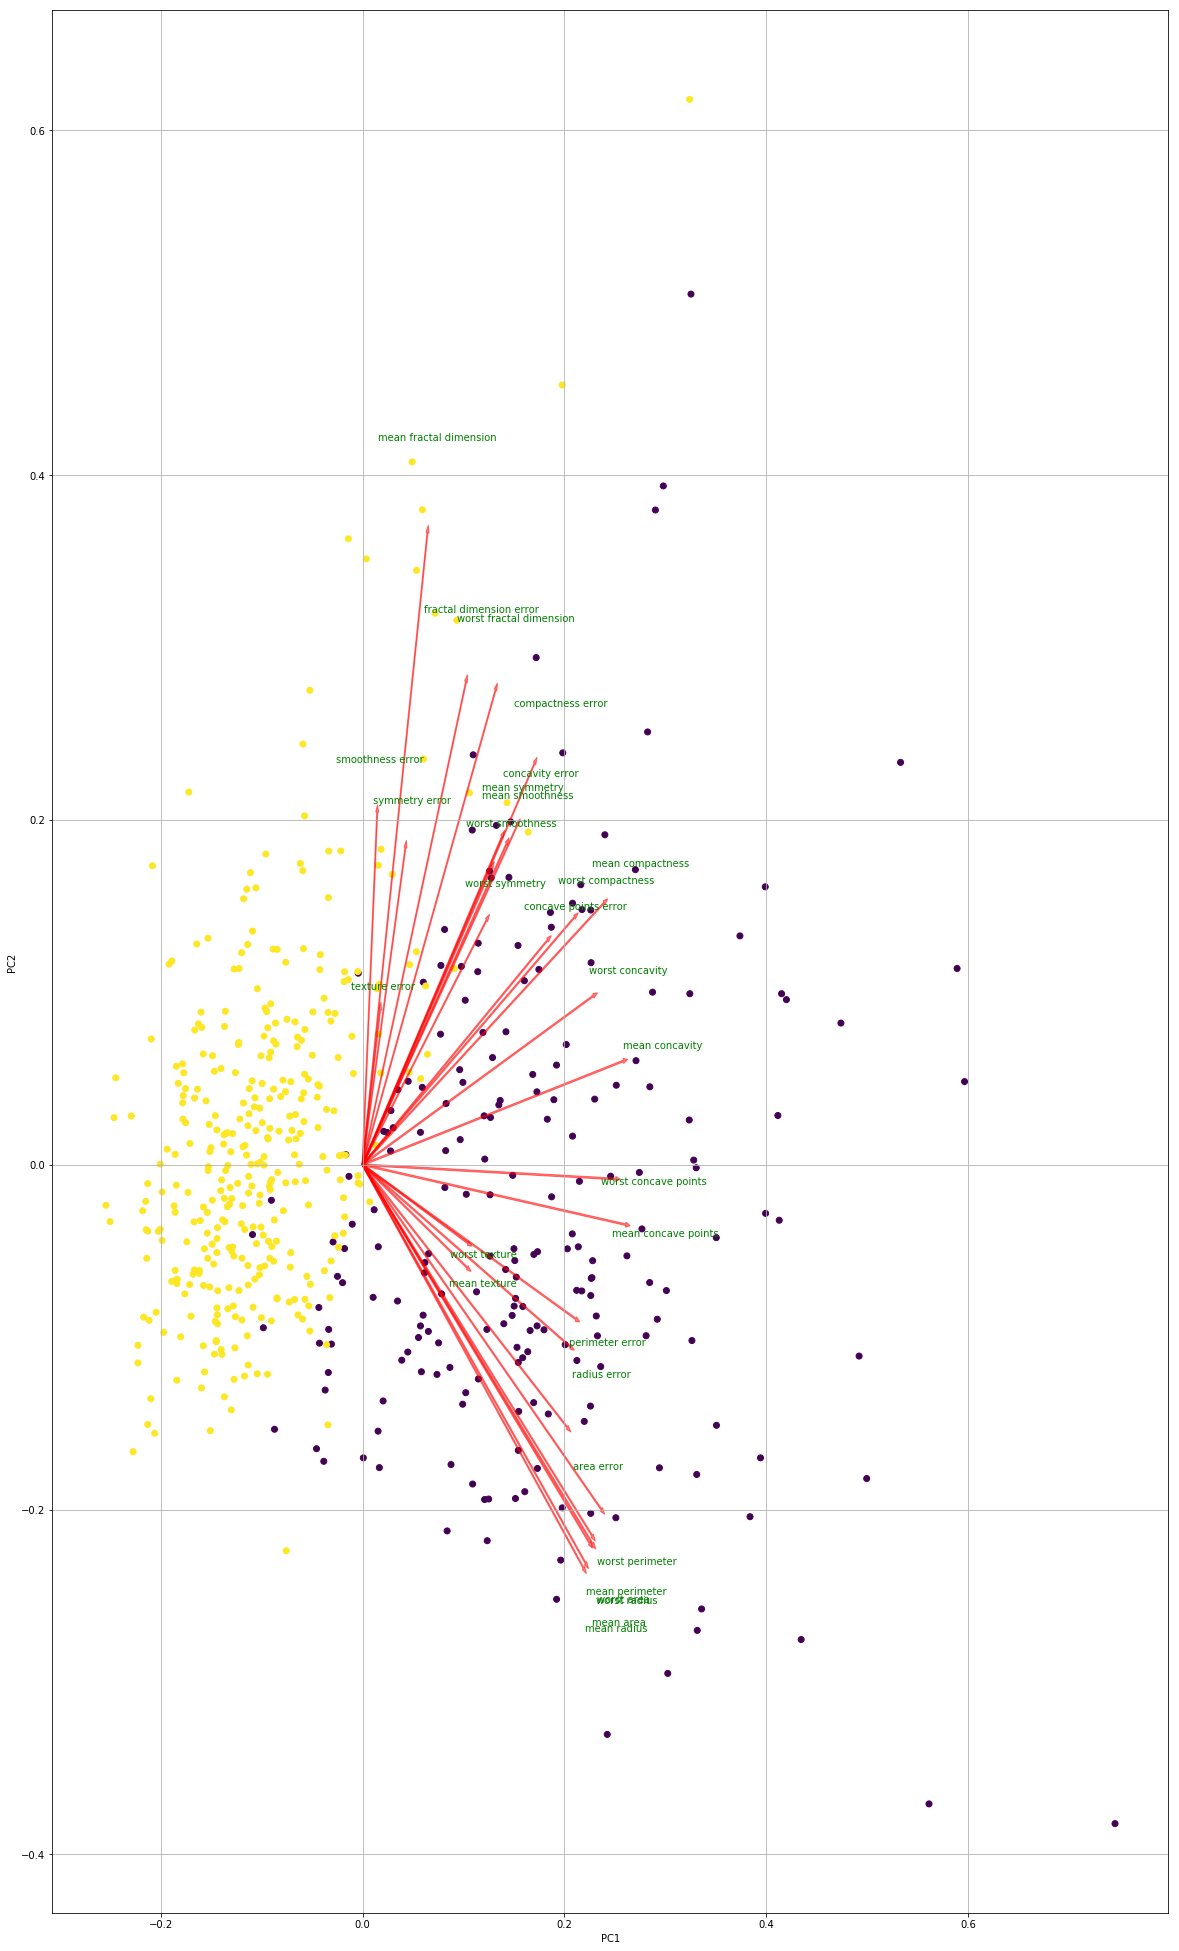

In [154]:
plt.figure(figsize=(20,35))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, feat[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
            
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(principalComponents,np.transpose(pca.components_))

In [47]:
X_new = pd.DataFrame(X)

In [48]:
X_new.columns= load_data.feature_names

In [49]:
load_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [50]:
X_new.drop(axis=1, columns=[ 'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], inplace=True)

In [51]:
X_new_values= StandardScaler().fit_transform(X_new.values)

In [52]:
pca1 = PCA(n_components=2)

In [53]:
pca_new = pca1.fit_transform(X_new_values)

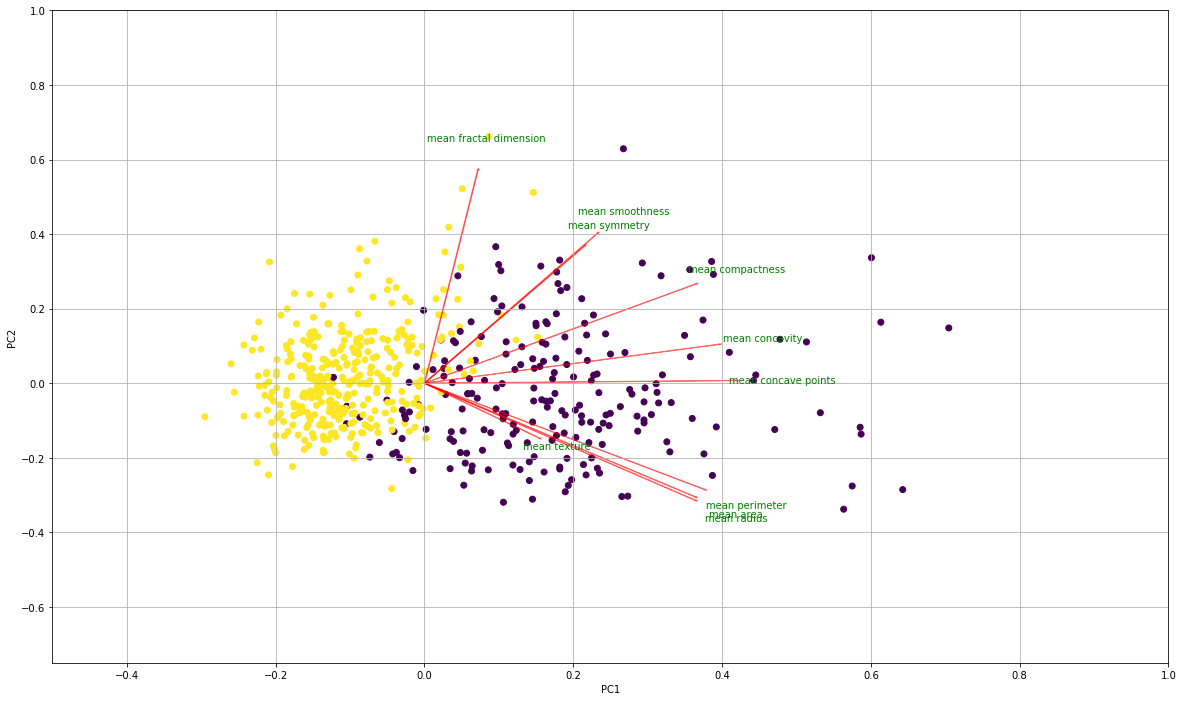

In [54]:
plt.figure(figsize=(20,12))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, feat[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
            
    plt.xlim(-0.5,1)
    plt.ylim(-0.75,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca_new,np.transpose(pca1.components_))

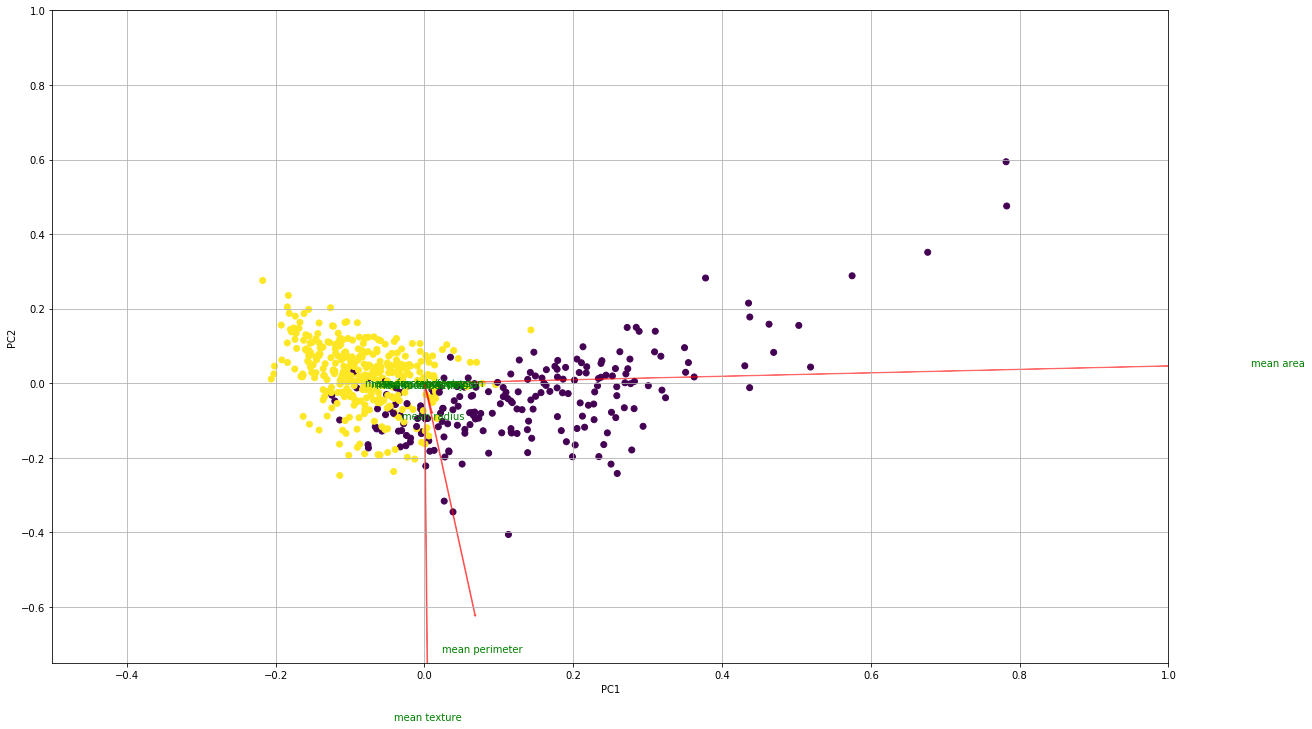

In [55]:
pca2 = PCA(n_components=2)
pca2_new = pca2.fit_transform(X_new)
plt.figure(figsize=(20,12))
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, feat[i], color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5,1)
    plt.ylim(-0.75,1)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

#Call the function. Use only the 2 PCs.
myplot(pca2_new,np.transpose(pca2.components_))

In [56]:
data.corr()

mean radius  mean texture  mean perimeter  mean area  \
mean radius                 1.000000      0.323782        0.997855   0.987357   
mean texture                0.323782      1.000000        0.329533   0.321086   
mean perimeter              0.997855      0.329533        1.000000   0.986507   
mean area                   0.987357      0.321086        0.986507   1.000000   
mean smoothness             0.170581     -0.023389        0.207278   0.177028   
mean compactness            0.506124      0.236702        0.556936   0.498502   
mean concavity              0.676764      0.302418        0.716136   0.685983   
mean concave points         0.822529      0.293464        0.850977   0.823269   
mean symmetry               0.147741      0.071401        0.183027   0.151293   
mean fractal dimension     -0.311631     -0.076437       -0.261477  -0.283110   
radius error                0.679090      0.275869        0.691765   0.732562   
texture error              -0.097317      0.386358       -0.086761  -0.066280   
perimeter error             0.674172      0.281673        0.693135   0.726628   
area error                  0.735864      0.259845        0.744983   0.800086   
smoothness error           -0.222600      0.006614       -0.202694  -0.166777   
compactness error           0.206000      0.191975        0.250744   0.212583   
concavity error             0.194204      0.143293        0.228082   0.207660   
concave points error        0.376169      0.163851        0.407217   0.372320   
symmetry error             -0.104321      0.009127       -0.081629  -0.072497   
fractal dimension error    -0.042641      0.054458       -0.005523  -0.019887   
worst radius                0.969539      0.352573        0.969476   0.962746   
worst texture               0.297008      0.912045        0.303038   0.287489   
worst perimeter             0.965137      0.358040        0.970387   0.959120   
worst area                  0.941082      0.343546        0.941550   0.959213   
worst smoothness            0.119616      0.077503        0.150549   0.123523   
worst compactness           0.413463      0.277830        0.455774   0.390410   
worst concavity             0.526911      0.301025        0.563879   0.512606   
worst concave points        0.744214      0.295316        0.771241   0.722017   
worst symmetry              0.163953      0.105008        0.189115   0.143570   
worst fractal dimension     0.007066      0.119205        0.051019   0.003738   

                         mean smoothness  mean compactness  mean concavity  \
mean radius                     0.170581          0.506124        0.676764   
mean texture                   -0.023389          0.236702        0.302418   
mean perimeter                  0.207278          0.556936        0.716136   
mean area                       0.177028          0.498502        0.685983   
mean smoothness                 1.000000          0.659123        0.521984   
mean compactness                0.659123          1.000000        0.883121   
mean concavity                  0.521984          0.883121        1.000000   
mean concave points             0.553695          0.831135        0.921391   
mean symmetry                   0.557775          0.602641        0.500667   
mean fractal dimension          0.584792          0.565369        0.336783   
radius error                    0.301467          0.497473        0.631925   
texture error                   0.068406          0.046205        0.076218   
perimeter error                 0.296092          0.548905        0.660391   
area error                      0.246552          0.455653        0.617427   
smoothness error                0.332375          0.135299        0.098564   
compactness error               0.318943          0.738722        0.670279   
concavity error                 0.248396          0.570517        0.691270   
concave points error            0.380676          0.642262        0.683260   
symmetry error                 

Text(0.5, 1.0, 'Correlation between different fearures')

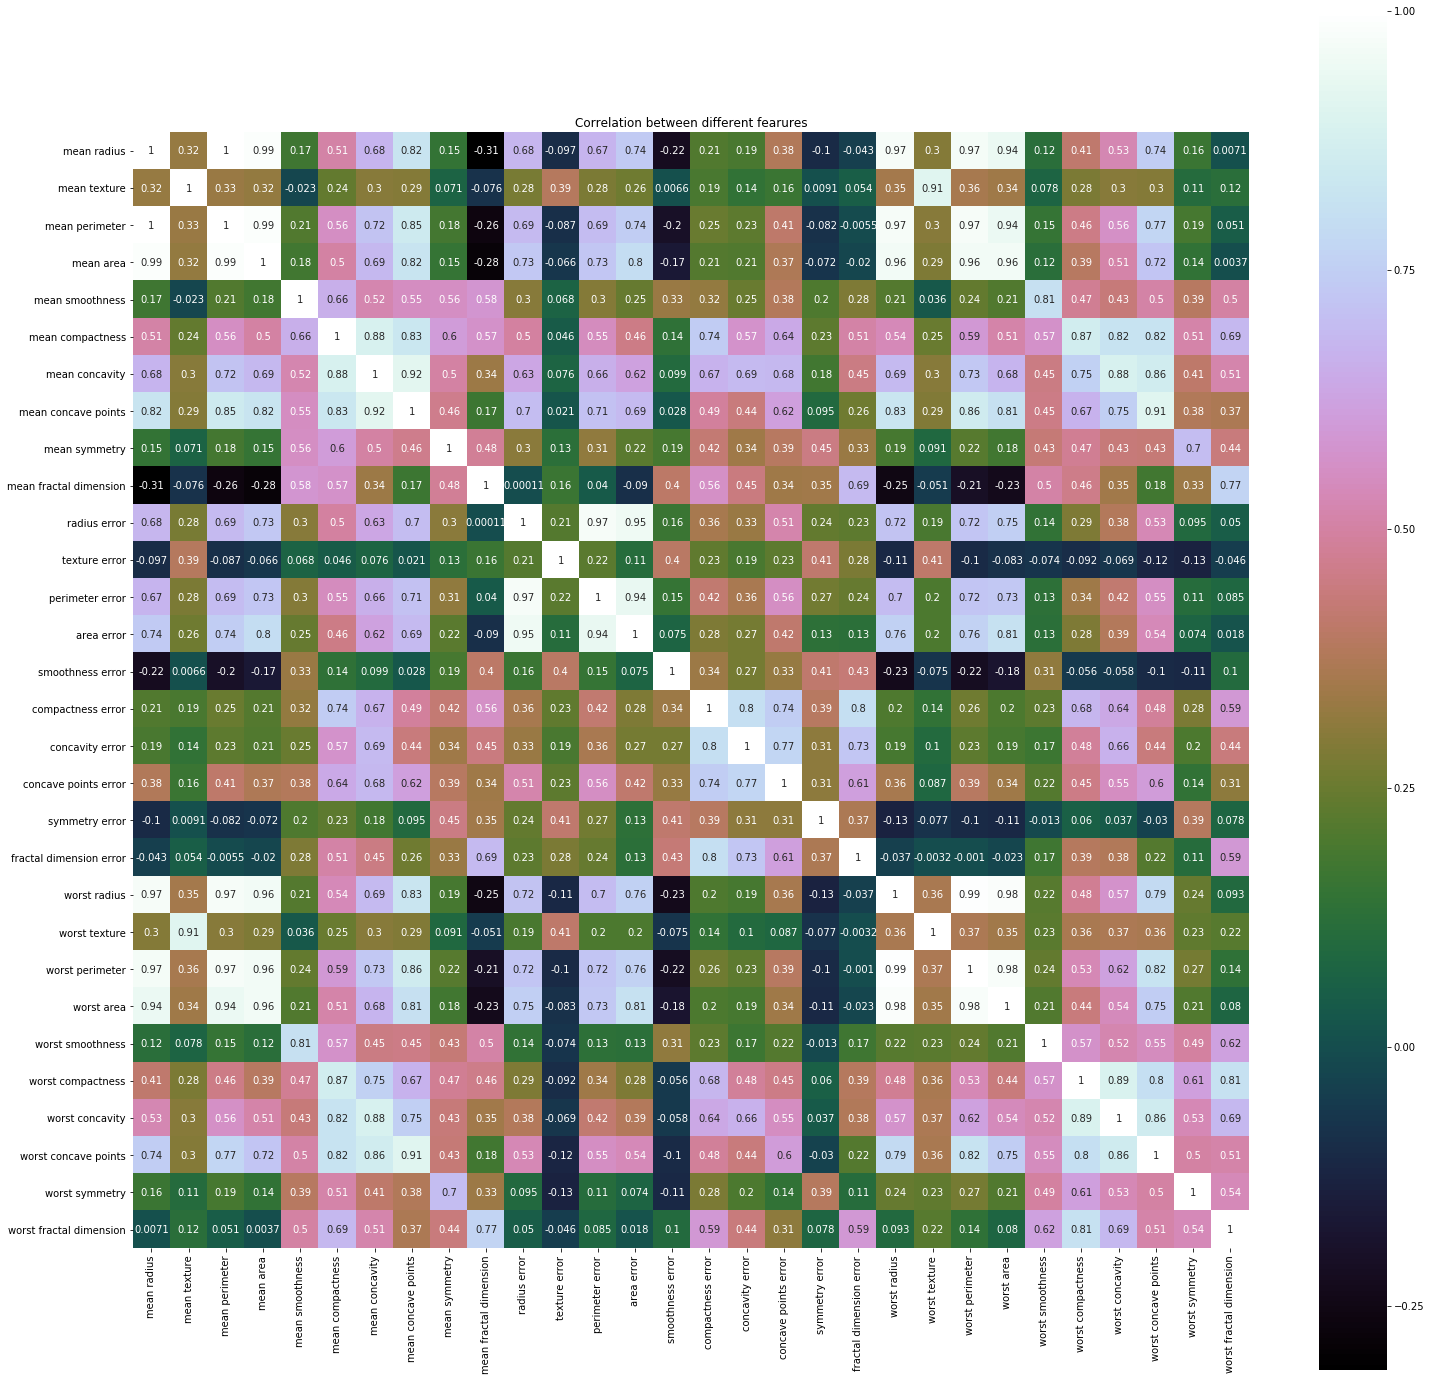

In [57]:
correlation = data.corr()
plt.figure(figsize=(25,25))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Correlation between different fearures')

C:\Users\fathinah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



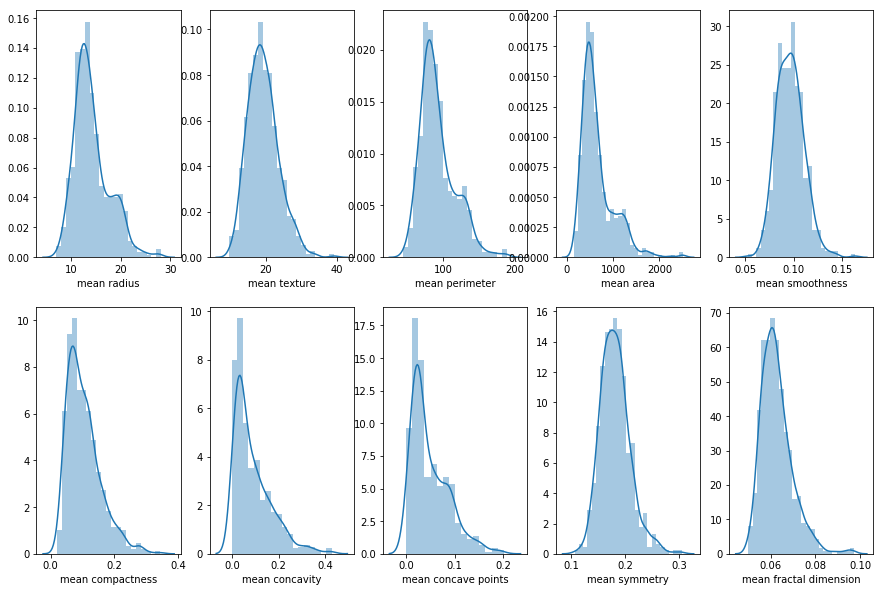

In [70]:
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,10))

for i, column in enumerate(X_new.columns):
    sns.distplot(X_new[column],ax=axes[i//5,i%5])
    plt.xlabel(column)

In [74]:
data_apus= data[['radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension']]

C:\Users\fathinah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



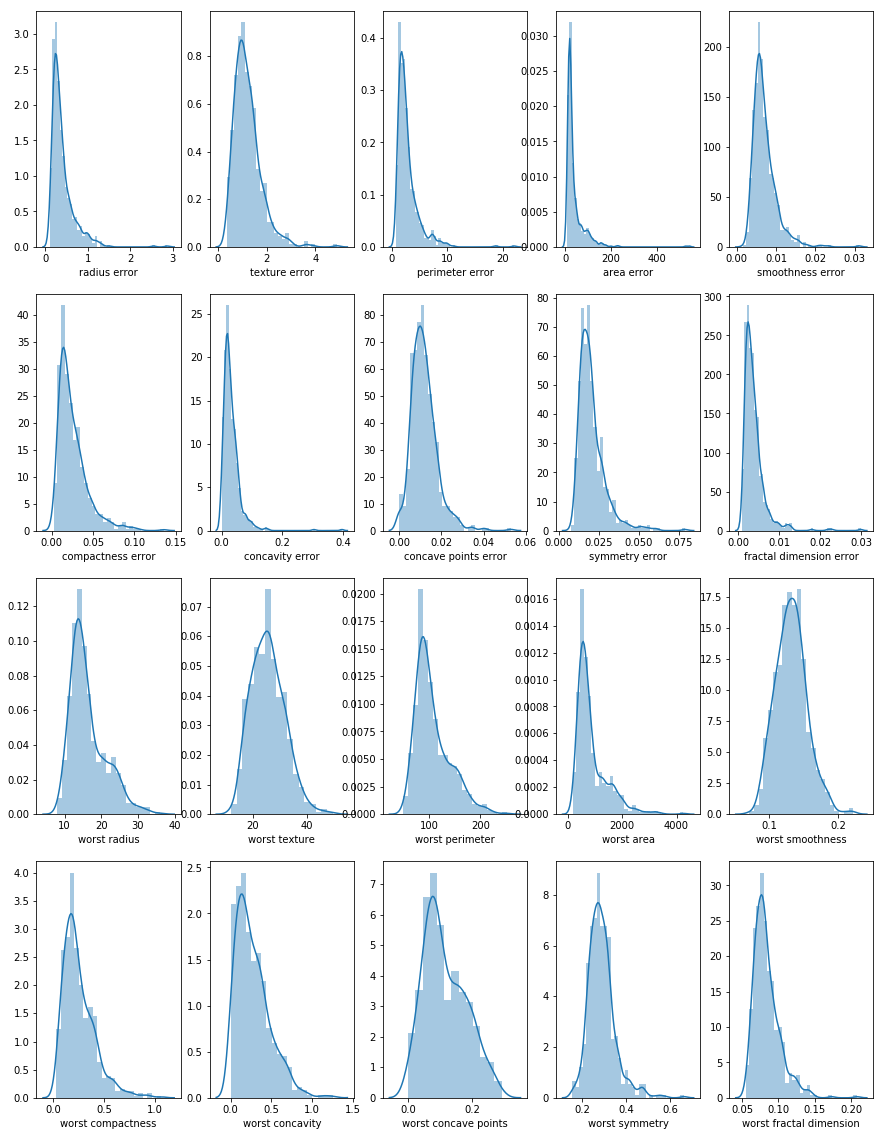

In [77]:
fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,20))

for i, column in enumerate(data_apus.columns):
    sns.distplot(data_apus[column],ax=axes[i//5,i%5])
    plt.xlabel(column)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

# Boxplots

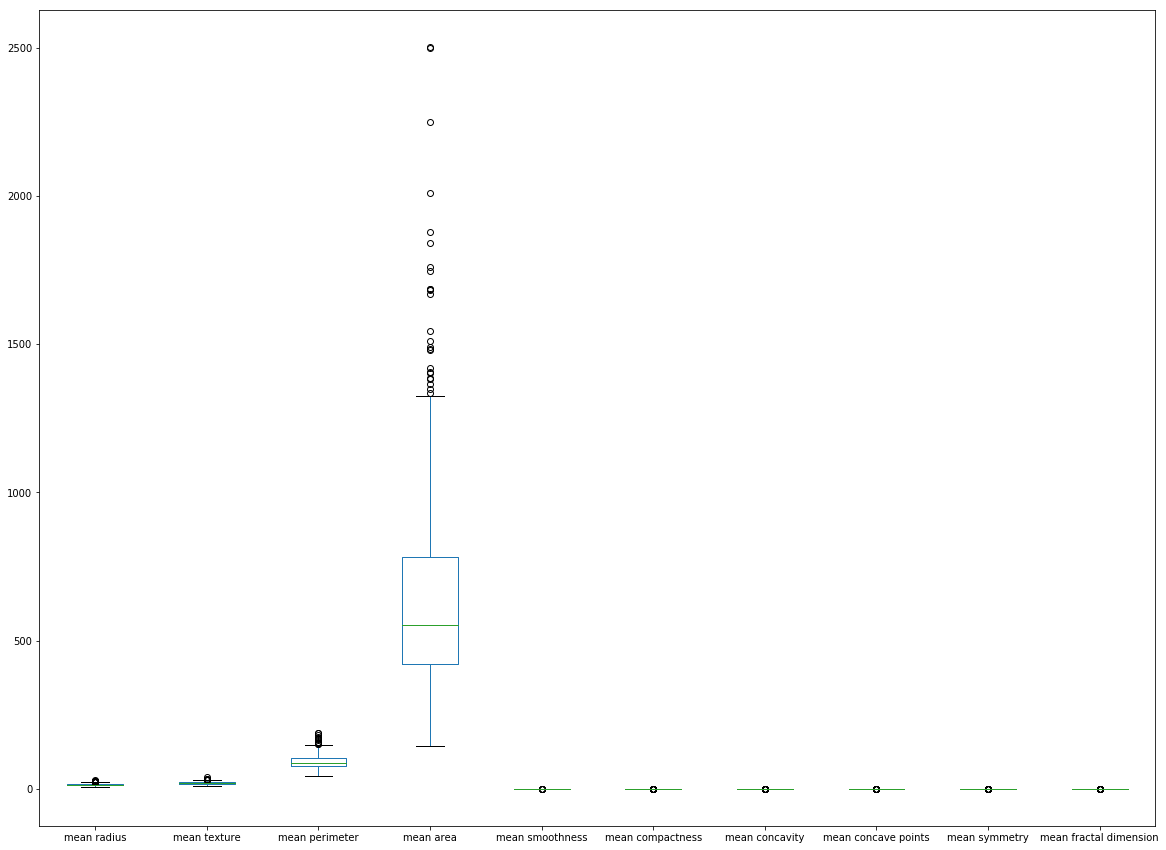

In [114]:
X_new.plot.box(figsize=(20,15))

In [92]:
a = pd.DataFrame(X_new_values)

In [110]:
a.columns=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension']

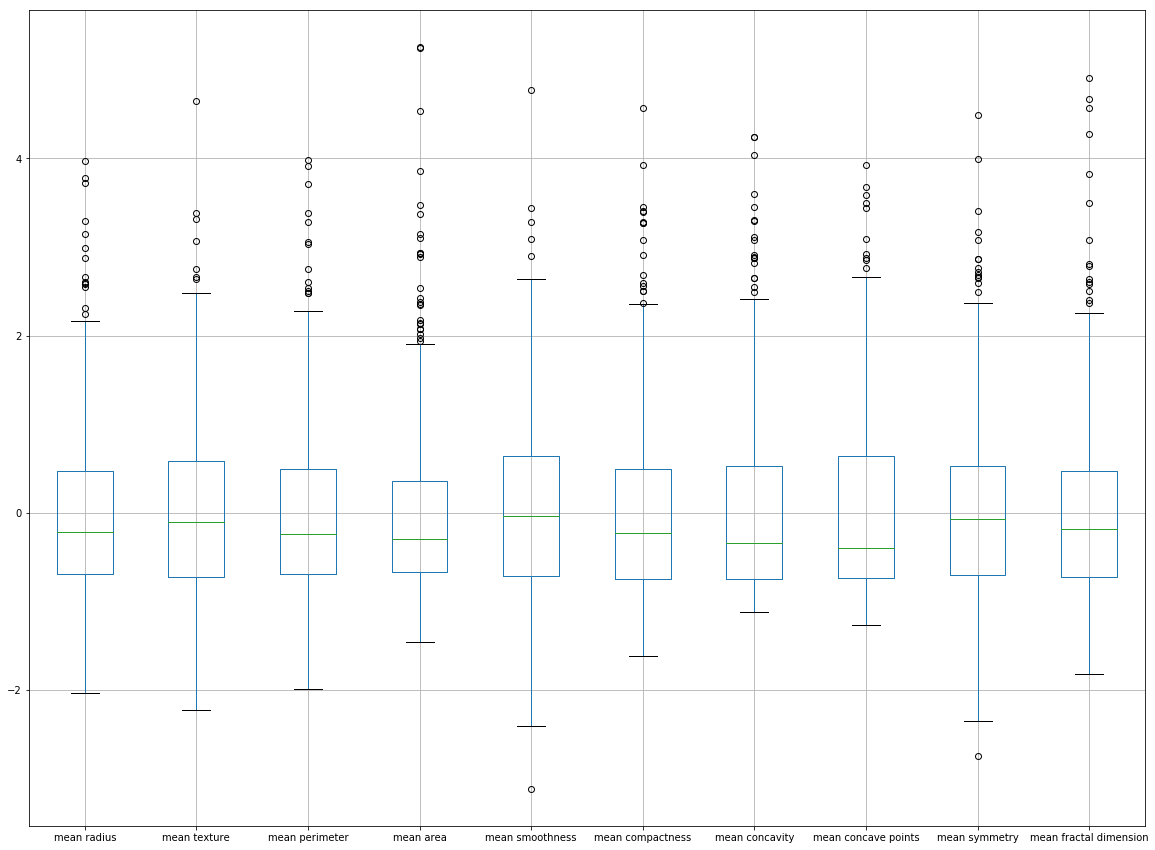

In [115]:
a.boxplot(figsize=(20,15),grid=True)